# Categorical analysis - parallel

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\exploratory-data-analysis


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

#### load data categorical generated by percentile of all variables
This is generated in the notebook 0

In [3]:
data_percentile = pd.read_pickle('data/data_percentile.pkl')
data_percentile.head()

Price    quartile_Population   quartile_MedInc quartile_AveBedrms  \
0  4.526       q1 - (3.0-787.0)  q4 - (4.74-15.0)   q2 - (1.01-1.05)   
1  3.585  q4 - (1725.0-35682.0)  q4 - (4.74-15.0)   q1 - (0.33-1.01)   
2  3.521       q1 - (3.0-787.0)  q4 - (4.74-15.0)    q3 - (1.05-1.1)   
3  3.413       q1 - (3.0-787.0)  q4 - (4.74-15.0)    q3 - (1.05-1.1)   
4  3.422       q1 - (3.0-787.0)  q3 - (3.53-4.74)    q3 - (1.05-1.1)   

    quartile_Latitude quartile_AveOccup   quartile_AveRooms  \
0  q4 - (37.71-41.95)  q2 - (2.43-2.82)  q4 - (6.05-141.91)   
1  q4 - (37.71-41.95)  q1 - (0.69-2.43)  q4 - (6.05-141.91)   
2  q4 - (37.71-41.95)  q2 - (2.43-2.82)  q4 - (6.05-141.91)   
3  q4 - (37.71-41.95)  q2 - (2.43-2.82)    q3 - (5.23-6.05)   
4  q4 - (37.71-41.95)  q1 - (0.69-2.43)  q4 - (6.05-141.91)   

      quartile_Longitude quartile_HouseAge   quartile_Price  
0  q1 - (-124.35--121.8)  q4 - (37.0-52.0)  q4 - (2.65-5.0)  
1  q1 - (-124.35--121.8)  q2 - (18.0-29.0)  q4 - (2.65-5.0)  
2  q1 - (-124.35--121.8)  q4 - (37.0-52.0)  q4 - (2.65-5.0)  
3  q1 - (-124.35--121.8)  q4 - (37.0-52.0)  q4 - (2.65-5.0)  
4  q1 - (-124.35--121.8)  q4 - (37.0-52.0)  q4 - (2.65-5.0)

In [4]:
data_discrete = data_percentile.copy()

#### load data original

In [5]:
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

# joinn and rename dataset
data_continous = data_X.copy()
data_continous['Price'] = data_y
data_continous.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

### 1. examples codes
docu parallel: https://plotly.com/python/parallel-categories-diagram/

docu general plotly exprees: https://plotly.com/python/plotly-express/

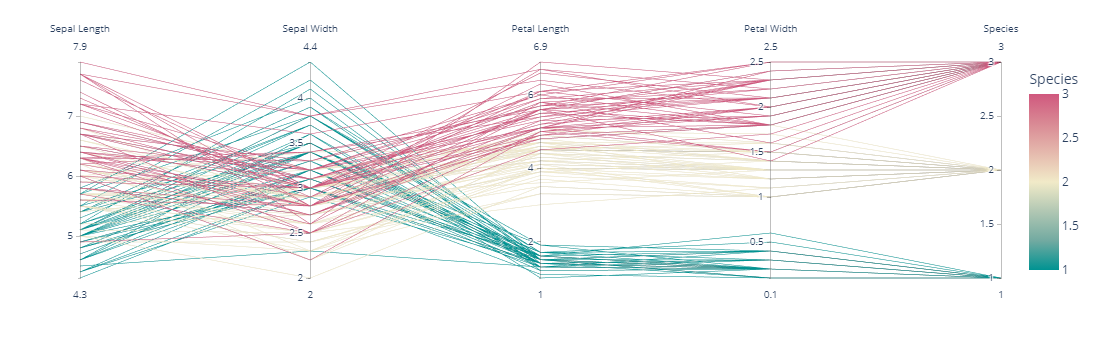

In [6]:
# example 1 - features continuous - target discrete
df = px.data.iris()
fig = px.parallel_coordinates(df, 
                              color="species_id", 
                              labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [7]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

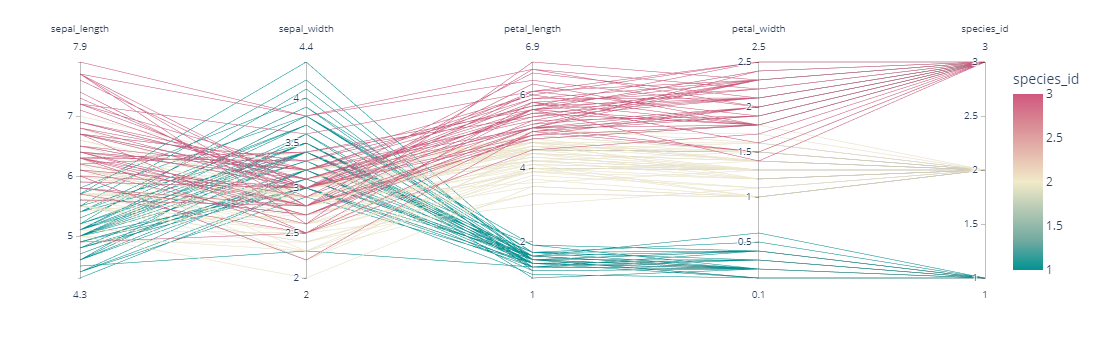

In [8]:
### example 1.b - same example 1 with no rename the labels
df = px.data.iris()
fig = px.parallel_coordinates(df, 
                              color="species_id",
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

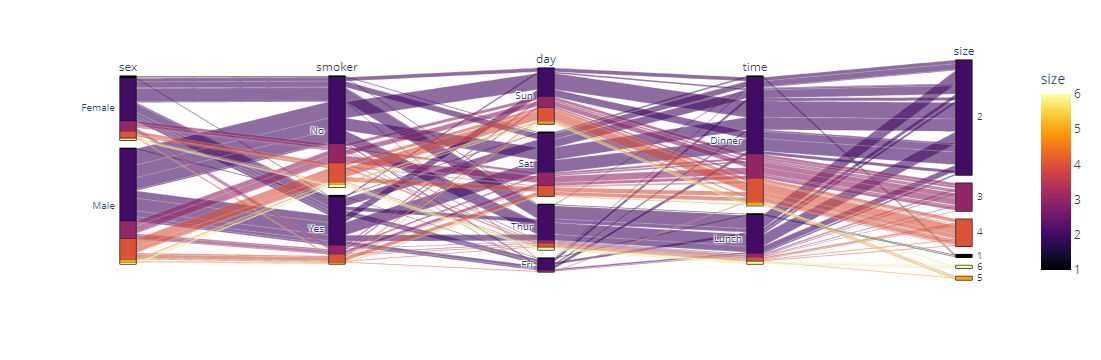

In [9]:
### example 2 - features categories - target categories
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

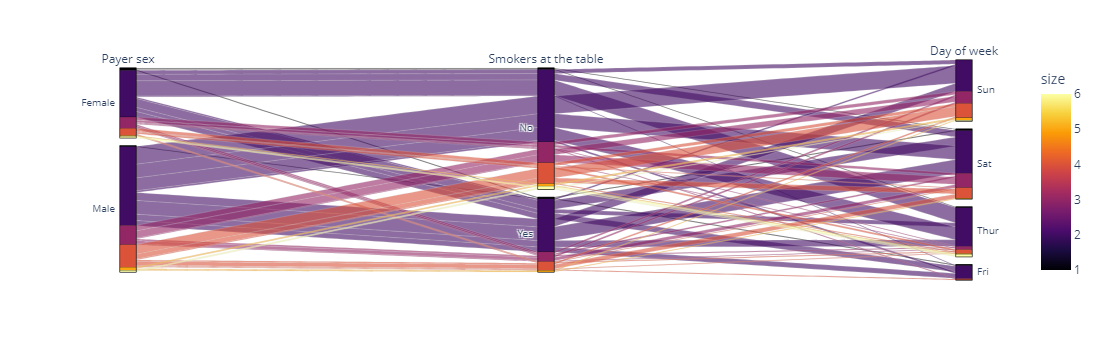

In [10]:
#### example 2.b - samme example 2 limited the number of features
df = px.data.tips()
fig = px.parallel_categories(df, dimensions=['sex', 'smoker', 'day'],
                color="size", color_continuous_scale=px.colors.sequential.Inferno,
                labels={'sex':'Payer sex', 'smoker':'Smokers at the table', 'day':'Day of week'})
fig.show()

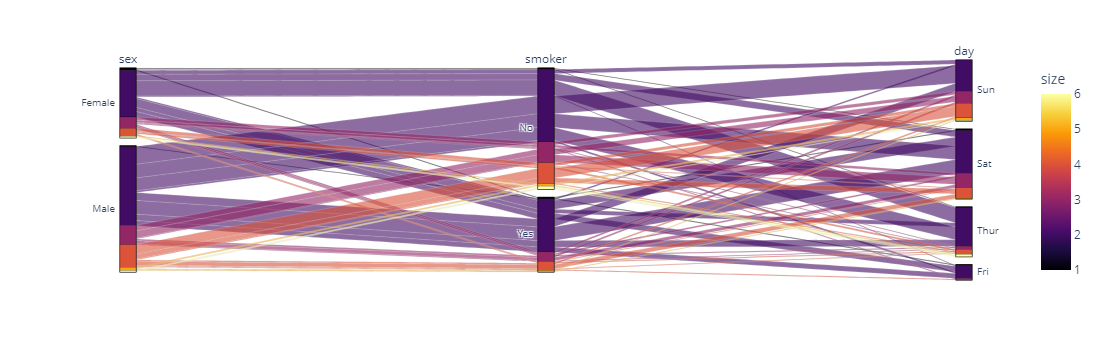

In [11]:
#### example 2.b - samme example 2 limited the number of features - delete labels
df = px.data.tips()
fig = px.parallel_categories(df, 
                             dimensions=['sex', 'smoker', 'day'],
                             color="size", 
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

### 2. codes to generate eda - discrete parallel

It is necessary define
- df: dataframe with the data

- list_features_target: list with the features to plot in the parallel. Also it needs to have the target. the features need to be in the dataframe

- target: string with the target. the target needs to be in the dataframe

In [12]:
#### PARAMS

# generate list features to plot
list_features_discrete = data_percentile.columns.tolist()[1:3]

# generate target
target_discrete = data_percentile.columns.tolist()[-1]

# generate list_features_target
list_features_target =  list_features_discrete + [target_discrete]

print('features to plot (discrete): ', list_features_target)
print('\ntarget (discrete): ', target_discrete)

features to plot (discrete):  ['quartile_Population', 'quartile_MedInc', 'quartile_Price']

target (discrete):  quartile_Price


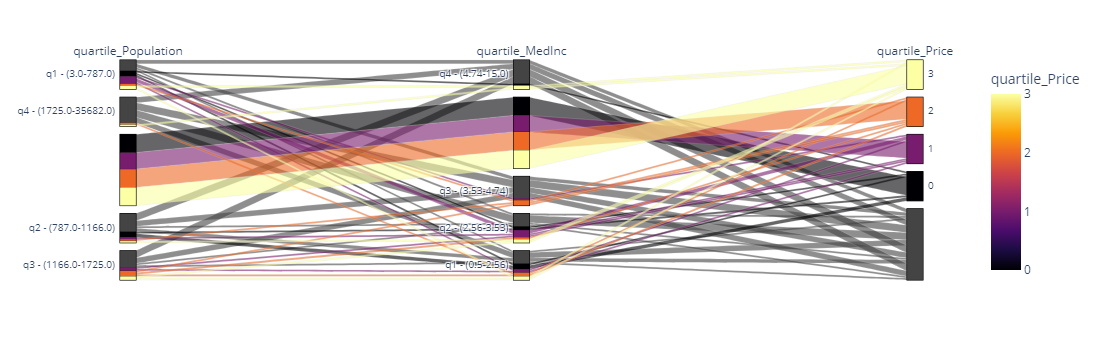

In [13]:
##### TRANSFORMATIONS
# generate df to plot in parallel plot. in this kind of plot duplicated values are not soported and return an error
data_percentile_parallel = data_percentile[list_features_target].drop_duplicates()


# transform target_discrete string into integer. using internally definition of the variable in pandas.
# this is neccesary to color the parallel according the values of the target
data_percentile_parallel[target_discrete] = data_percentile_parallel[target_discrete].cat.codes

# transform all columnas as object pandas dtype to plot the count de freq
data_percentile_parallel = data_percentile_parallel.astype(object)


#### PLOT
fig = px.parallel_categories(data_percentile_parallel, 
                             color = target_discrete, 
                             color_continuous_scale=px.colors.sequential.Inferno)

fig.show()

fig.write_html("output_eda/5_categorical_analysis/parallel_discrete.html")

### 3. sinthetize

In [14]:
def plot_parallel_discrete_variables(df_percentile, list_features_target, target):
    """
    Plot a parallel with features discretes variables an target discrete
    
    Important the discrete variables can be a string categorical (ex 'low', 'medium', 'high').
    
    But in the parallel plot, it needs to be colored according the target and it needs to be a numerical category. This function transform it into 
    a integer categorical (ex. 1, 2, 3). This only works if the column categorical in pandas as internally defined the order in the string categories 
    (ex: 'low' < 'medium' < 'high') (pandas dtype category)

    Args
        df (dataframe): dataframe with the data
        list_features_target (list): list with the features to plot in the parallel plot and also it has to have the target
        target_discrete (string): in addition it is necesary define a string with the name of the target

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """
    # generate df to plot in parallel plot. in this kind of plot duplicated values are not soported and return an error
    df_percentile_parallel = df_percentile[list_features_target].drop_duplicates()

    # transform target_discrete string into integer. using internally definition of the variable in pandas.
    # this is neccesary to color the parallel according the values of the target
    df_percentile_parallel[target] = df_percentile_parallel[target].cat.codes

    # plot
    fig = px.parallel_categories(df_percentile_parallel, 
                                 color = target, 
                                 color_continuous_scale=px.colors.sequential.Inferno)

    # change title
    fig.update_layout(
      title_text = "Parallel discrete variables",
        title_x = 0.5,
    title_font = dict(size = 28)
      )

    return fig

In [15]:
#### PARAMS

# generate list features to plot
list_features_discrete = data_percentile.columns.tolist()[1:3]

# generate target
target = data_percentile.columns.tolist()[-1]

# generate list_features_target
list_features_target =  list_features_discrete + [target]

print('features to plot (discrete): ', list_features_target)
print('\ntarget (discrete): ', target)

features to plot (discrete):  ['quartile_Population', 'quartile_MedInc', 'quartile_Price']

target (discrete):  quartile_Price


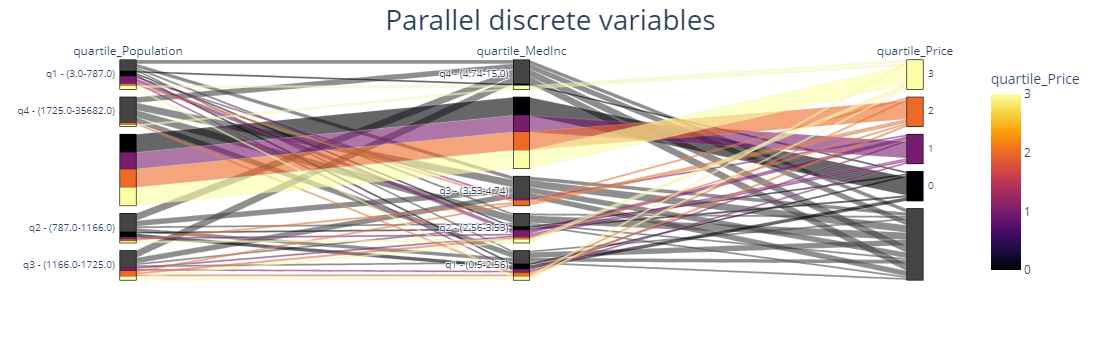

In [16]:
fig_parallel_discrete = plot_parallel_discrete_variables(df_percentile = data_discrete, 
                                                  list_features_target = list_features_target, 
                                                  target = target_discrete)

fig_parallel_discrete.show()

# save
fig_parallel_discrete.write_html("output_eda/5_categorical_analysis/parallel_discrete.html")